In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
kannur_meteo = pd.read_csv('/kaggle/input/kerala-aqi/Kerala/Metrological Data/Kannur.csv', skiprows = 2, delimiter=',')
kannur_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°)
0,2024-01-01T00:00,24.2,82,0.0,1009.8,5.2,106,8.4,137
1,2024-01-01T01:00,24.7,75,0.0,1010.4,7.1,60,10.7,70
2,2024-01-01T02:00,25.1,69,0.0,1011.0,10.3,65,21.1,70
3,2024-01-01T03:00,26.8,60,0.0,1011.8,13.1,69,28.5,69
4,2024-01-01T04:00,29.1,52,0.0,1012.2,12.6,63,17.7,63
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,25.0,85,0.0,1010.3,9.5,2,19.2,355
8780,2024-12-31T20:00,24.7,86,0.0,1009.7,9.3,18,18.3,7
8781,2024-12-31T21:00,24.1,86,0.0,1009.1,8.6,33,16.8,23
8782,2024-12-31T22:00,23.9,75,0.0,1008.8,13.1,43,27.7,49


In [3]:
kannur_pollutants = pd.read_csv('/kaggle/input/kerala-aqi/Kerala/Pollutants/Kannur.csv', delimiter= ',')
kannur_pollutants['Timestamp'] = kannur_meteo['time']
kannur_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
kannur_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,24.58,57.66,2.90,4.75,8.00,2.16,14.00,0.65,31.54,...,0.10,33.58,51.58,6.31,260.92,0.0,0.0,33.57,NaN,NaN
1,2024-01-01T01:00,24.52,57.05,2.87,4.87,7.30,2.28,17.13,0.58,31.50,...,0.11,33.50,51.50,6.18,259.56,0.0,0.0,23.07,NaN,NaN
2,2024-01-01T02:00,25.08,58.70,2.93,4.52,7.43,2.30,5.28,0.08,31.45,...,0.11,33.45,51.45,5.57,256.13,0.0,0.0,16.34,NaN,NaN
3,2024-01-01T03:00,25.32,58.80,2.96,5.09,7.56,2.27,9.00,0.10,31.45,...,0.10,33.45,51.45,6.18,259.59,0.0,0.0,15.54,NaN,NaN
4,2024-01-01T04:00,20.21,47.86,2.40,4.81,7.58,1.95,12.62,0.21,31.44,...,0.09,33.44,51.44,5.98,258.72,0.0,0.0,16.17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,30.28,61.13,4.14,12.08,16.94,4.51,2.46,0.68,26.39,...,NaN,33.39,51.39,2.57,238.98,0.0,0.0,9.09,NaN,NaN
8780,2024-12-31T20:00,29.33,59.20,4.00,11.98,16.95,4.81,2.39,0.65,26.40,...,NaN,33.39,51.40,2.52,238.64,0.0,0.0,9.34,NaN,NaN
8781,2024-12-31T21:00,29.22,58.98,3.94,11.88,17.26,4.47,2.38,0.65,26.47,...,NaN,33.47,51.47,2.72,239.94,0.0,0.0,19.38,NaN,NaN
8782,2024-12-31T22:00,32.00,64.56,4.12,12.36,15.98,4.56,2.59,0.71,26.46,...,NaN,33.46,51.46,2.75,240.12,0.0,0.0,17.33,NaN,NaN


In [4]:
kannur = pd.merge(kannur_meteo.iloc[:, :], kannur_pollutants.iloc[:, 0:3], on='time')
kannur

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,24.2,82,0.0,1009.8,5.2,106,8.4,137,24.58,57.66
1,2024-01-01T01:00,24.7,75,0.0,1010.4,7.1,60,10.7,70,24.52,57.05
2,2024-01-01T02:00,25.1,69,0.0,1011.0,10.3,65,21.1,70,25.08,58.70
3,2024-01-01T03:00,26.8,60,0.0,1011.8,13.1,69,28.5,69,25.32,58.80
4,2024-01-01T04:00,29.1,52,0.0,1012.2,12.6,63,17.7,63,20.21,47.86
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,25.0,85,0.0,1010.3,9.5,2,19.2,355,30.28,61.13
8780,2024-12-31T20:00,24.7,86,0.0,1009.7,9.3,18,18.3,7,29.33,59.20
8781,2024-12-31T21:00,24.1,86,0.0,1009.1,8.6,33,16.8,23,29.22,58.98
8782,2024-12-31T22:00,23.9,75,0.0,1008.8,13.1,43,27.7,49,32.00,64.56


In [5]:
kannur['city'] = 'Kannur'
kannur

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,24.2,82,0.0,1009.8,5.2,106,8.4,137,24.58,57.66,Kannur
1,2024-01-01T01:00,24.7,75,0.0,1010.4,7.1,60,10.7,70,24.52,57.05,Kannur
2,2024-01-01T02:00,25.1,69,0.0,1011.0,10.3,65,21.1,70,25.08,58.70,Kannur
3,2024-01-01T03:00,26.8,60,0.0,1011.8,13.1,69,28.5,69,25.32,58.80,Kannur
4,2024-01-01T04:00,29.1,52,0.0,1012.2,12.6,63,17.7,63,20.21,47.86,Kannur
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,25.0,85,0.0,1010.3,9.5,2,19.2,355,30.28,61.13,Kannur
8780,2024-12-31T20:00,24.7,86,0.0,1009.7,9.3,18,18.3,7,29.33,59.20,Kannur
8781,2024-12-31T21:00,24.1,86,0.0,1009.1,8.6,33,16.8,23,29.22,58.98,Kannur
8782,2024-12-31T22:00,23.9,75,0.0,1008.8,13.1,43,27.7,49,32.00,64.56,Kannur


In [6]:
kannur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             5298 non-null   float64
 10  PM10 (µg/m³)              5297 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [7]:
kannur = kannur.interpolate()
kannur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [8]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    kannur[delay1_col] = kannur[col].shift(1)
    delay2_col = col + "_delay2"
    kannur[delay2_col] = kannur[col].shift(2)
    kannur.loc[0, delay1_col] = kannur[col].iloc[-1]
    kannur.loc[1, delay2_col] = kannur[col].iloc[-1]
    kannur.loc[0, delay2_col] = kannur[col].iloc[-2]

kannur

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,24.2,82,0.0,1009.8,5.2,106,8.4,137,24.58,57.66,Kannur,28.42,32.00,57.40,64.56
1,2024-01-01T01:00,24.7,75,0.0,1010.4,7.1,60,10.7,70,24.52,57.05,Kannur,24.58,28.42,57.66,57.40
2,2024-01-01T02:00,25.1,69,0.0,1011.0,10.3,65,21.1,70,25.08,58.70,Kannur,24.52,24.58,57.05,57.66
3,2024-01-01T03:00,26.8,60,0.0,1011.8,13.1,69,28.5,69,25.32,58.80,Kannur,25.08,24.52,58.70,57.05
4,2024-01-01T04:00,29.1,52,0.0,1012.2,12.6,63,17.7,63,20.21,47.86,Kannur,25.32,25.08,58.80,58.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,25.0,85,0.0,1010.3,9.5,2,19.2,355,30.28,61.13,Kannur,29.92,31.16,60.40,62.88
8780,2024-12-31T20:00,24.7,86,0.0,1009.7,9.3,18,18.3,7,29.33,59.20,Kannur,30.28,29.92,61.13,60.40
8781,2024-12-31T21:00,24.1,86,0.0,1009.1,8.6,33,16.8,23,29.22,58.98,Kannur,29.33,30.28,59.20,61.13
8782,2024-12-31T22:00,23.9,75,0.0,1008.8,13.1,43,27.7,49,32.00,64.56,Kannur,29.22,29.33,58.98,59.20


In [9]:
thiruvananthapuram_meteo = pd.read_csv('/kaggle/input/kerala-aqi/Kerala/Metrological Data/Thiruvananthapuram.csv', skiprows=2, delimiter=',')
thiruvananthapuram_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°)
0,2024-01-01T00:00,24.5,84,0.0,1009.8,6.2,36,6.3,59
1,2024-01-01T01:00,24.6,82,0.0,1010.6,5.1,94,9.9,100
2,2024-01-01T02:00,25.2,81,0.0,1011.8,9.0,119,15.5,115
3,2024-01-01T03:00,27.1,72,0.0,1012.7,7.8,112,11.3,112
4,2024-01-01T04:00,29.1,62,0.0,1012.8,6.7,106,9.3,103
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,26.6,76,0.0,1009.7,3.1,353,5.7,18
8780,2024-12-31T20:00,26.5,72,0.0,1009.3,4.1,358,6.2,21
8781,2024-12-31T21:00,26.2,71,0.0,1008.7,4.5,16,8.0,34
8782,2024-12-31T22:00,25.7,71,0.0,1007.8,4.5,2,8.8,15


In [10]:
thiruvananthapuram_pollutants = pd.read_csv('/kaggle/input/kerala-aqi/Kerala/Pollutants/Thiruvananthapuram.csv', delimiter= ',')
thiruvananthapuram_pollutants['Timestamp'] = thiruvananthapuram_meteo['time']
thiruvananthapuram_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
thiruvananthapuram_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,38.67,70.54,3.00,7.30,10.87,3.00,5.23,0.41,28.32,...,NaN,28.97,92.15,0.90,184.35,0.0,0.0,81.92,NaN,NaN
1,2024-01-01T01:00,36.42,66.88,2.86,7.13,10.59,2.86,5.96,0.43,26.85,...,NaN,28.58,93.45,0.84,247.84,0.0,0.0,76.89,NaN,NaN
2,2024-01-01T02:00,40.66,74.11,3.14,7.05,10.07,3.14,6.82,0.48,29.75,...,NaN,28.38,92.72,0.96,271.36,0.0,0.0,74.30,NaN,NaN
3,2024-01-01T03:00,40.12,73.14,3.11,6.96,9.85,3.11,6.90,0.37,29.36,...,NaN,27.92,85.76,0.93,289.63,0.0,0.0,68.32,NaN,NaN
4,2024-01-01T04:00,38.63,70.80,3.02,7.09,10.21,3.02,5.66,0.36,28.42,...,NaN,27.52,86.31,0.70,259.09,0.0,0.0,63.18,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,28.82,64.24,3.63,13.57,11.48,5.43,8.79,0.73,24.80,...,NaN,30.55,67.46,0.76,80.11,0.0,0.0,67.37,752.67,NaN
8780,2024-12-31T20:00,29.51,65.22,3.35,15.45,12.16,5.04,10.63,0.68,23.69,...,NaN,30.32,68.50,0.55,76.69,0.0,0.0,65.12,753.00,NaN
8781,2024-12-31T21:00,28.95,63.76,2.54,11.46,9.46,5.67,10.77,0.82,25.76,...,NaN,29.92,70.16,0.38,97.92,0.0,0.0,61.44,754.00,NaN
8782,2024-12-31T22:00,25.61,55.82,2.64,10.34,8.76,8.44,11.22,0.67,23.77,...,NaN,29.44,68.99,0.62,62.72,0.0,0.0,58.72,753.75,NaN


In [11]:
thiruvananthapuram = pd.merge(thiruvananthapuram_meteo.iloc[:, :], thiruvananthapuram_pollutants.iloc[:, 0:3], on='time')
thiruvananthapuram

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,24.5,84,0.0,1009.8,6.2,36,6.3,59,38.67,70.54
1,2024-01-01T01:00,24.6,82,0.0,1010.6,5.1,94,9.9,100,36.42,66.88
2,2024-01-01T02:00,25.2,81,0.0,1011.8,9.0,119,15.5,115,40.66,74.11
3,2024-01-01T03:00,27.1,72,0.0,1012.7,7.8,112,11.3,112,40.12,73.14
4,2024-01-01T04:00,29.1,62,0.0,1012.8,6.7,106,9.3,103,38.63,70.80
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,26.6,76,0.0,1009.7,3.1,353,5.7,18,28.82,64.24
8780,2024-12-31T20:00,26.5,72,0.0,1009.3,4.1,358,6.2,21,29.51,65.22
8781,2024-12-31T21:00,26.2,71,0.0,1008.7,4.5,16,8.0,34,28.95,63.76
8782,2024-12-31T22:00,25.7,71,0.0,1007.8,4.5,2,8.8,15,25.61,55.82


In [12]:
thiruvananthapuram['city'] = 'Thiruvananthapuram'
thiruvananthapuram

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,24.5,84,0.0,1009.8,6.2,36,6.3,59,38.67,70.54,Thiruvananthapuram
1,2024-01-01T01:00,24.6,82,0.0,1010.6,5.1,94,9.9,100,36.42,66.88,Thiruvananthapuram
2,2024-01-01T02:00,25.2,81,0.0,1011.8,9.0,119,15.5,115,40.66,74.11,Thiruvananthapuram
3,2024-01-01T03:00,27.1,72,0.0,1012.7,7.8,112,11.3,112,40.12,73.14,Thiruvananthapuram
4,2024-01-01T04:00,29.1,62,0.0,1012.8,6.7,106,9.3,103,38.63,70.80,Thiruvananthapuram
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,26.6,76,0.0,1009.7,3.1,353,5.7,18,28.82,64.24,Thiruvananthapuram
8780,2024-12-31T20:00,26.5,72,0.0,1009.3,4.1,358,6.2,21,29.51,65.22,Thiruvananthapuram
8781,2024-12-31T21:00,26.2,71,0.0,1008.7,4.5,16,8.0,34,28.95,63.76,Thiruvananthapuram
8782,2024-12-31T22:00,25.7,71,0.0,1007.8,4.5,2,8.8,15,25.61,55.82,Thiruvananthapuram


In [13]:
thiruvananthapuram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8781 non-null   float64
 10  PM10 (µg/m³)              8782 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [14]:
thiruvananthapuram = thiruvananthapuram.interpolate()
thiruvananthapuram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [15]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    thiruvananthapuram[delay1_col] = thiruvananthapuram[col].shift(1)
    delay2_col = col + "_delay2"
    thiruvananthapuram[delay2_col] = thiruvananthapuram[col].shift(2)
    thiruvananthapuram.loc[0, delay1_col] = thiruvananthapuram[col].iloc[-1]
    thiruvananthapuram.loc[1, delay2_col] = thiruvananthapuram[col].iloc[-1]
    thiruvananthapuram.loc[0, delay2_col] = thiruvananthapuram[col].iloc[-2]

thiruvananthapuram

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,24.5,84,0.0,1009.8,6.2,36,6.3,59,38.67,70.54,Thiruvananthapuram,26.15,25.61,57.10,55.82
1,2024-01-01T01:00,24.6,82,0.0,1010.6,5.1,94,9.9,100,36.42,66.88,Thiruvananthapuram,38.67,26.15,70.54,57.10
2,2024-01-01T02:00,25.2,81,0.0,1011.8,9.0,119,15.5,115,40.66,74.11,Thiruvananthapuram,36.42,38.67,66.88,70.54
3,2024-01-01T03:00,27.1,72,0.0,1012.7,7.8,112,11.3,112,40.12,73.14,Thiruvananthapuram,40.66,36.42,74.11,66.88
4,2024-01-01T04:00,29.1,62,0.0,1012.8,6.7,106,9.3,103,38.63,70.80,Thiruvananthapuram,40.12,40.66,73.14,74.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,26.6,76,0.0,1009.7,3.1,353,5.7,18,28.82,64.24,Thiruvananthapuram,24.26,20.51,53.02,43.82
8780,2024-12-31T20:00,26.5,72,0.0,1009.3,4.1,358,6.2,21,29.51,65.22,Thiruvananthapuram,28.82,24.26,64.24,53.02
8781,2024-12-31T21:00,26.2,71,0.0,1008.7,4.5,16,8.0,34,28.95,63.76,Thiruvananthapuram,29.51,28.82,65.22,64.24
8782,2024-12-31T22:00,25.7,71,0.0,1007.8,4.5,2,8.8,15,25.61,55.82,Thiruvananthapuram,28.95,29.51,63.76,65.22


In [16]:
thrissur_meteo = pd.read_csv('//kaggle/input/kerala-aqi/Kerala/Metrological Data/Thrissur.csv', skiprows=2, delimiter = ',')
thrissur_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°)
0,2024-01-01T00:00,24.9,72,0.0,1010.0,17.9,62,31.6,67
1,2024-01-01T01:00,25.0,72,0.0,1010.4,20.3,63,35.3,65
2,2024-01-01T02:00,25.2,73,0.0,1011.3,19.5,62,32.5,65
3,2024-01-01T03:00,26.8,67,0.0,1012.0,19.2,67,29.2,68
4,2024-01-01T04:00,29.1,58,0.0,1012.5,19.7,69,28.0,70
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,27.4,60,0.0,1009.9,21.1,60,36.1,61
8780,2024-12-31T20:00,26.9,62,0.0,1009.4,20.4,59,35.6,61
8781,2024-12-31T21:00,26.5,64,0.0,1009.0,20.2,61,35.3,63
8782,2024-12-31T22:00,26.1,64,0.0,1008.5,19.8,63,34.9,64


In [17]:
thrissur_pollutants = pd.read_csv('/kaggle/input/kerala-aqi/Kerala/Pollutants/Thrissur.csv', delimiter= ',')
thrissur_pollutants['Timestamp'] = thrissur_meteo['time']
thrissur_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
thrissur_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2024-01-01T01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,2024-01-01T02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2024-01-01T03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,2024-01-01T04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,28.92,48.86,6.44,8.80,13.32,0.98,0.33,1.45,30.39,...,NaN,28.86,57.30,2.47,247.80,0.0,0.0,156.95,NaN,NaN
8780,2024-12-31T20:00,28.32,47.82,6.39,9.27,14.24,0.98,1.94,1.42,30.37,...,NaN,28.66,58.21,2.18,247.14,0.0,0.0,154.35,NaN,NaN
8781,2024-12-31T21:00,28.71,48.50,7.04,9.15,14.36,0.93,1.61,1.44,30.36,...,NaN,28.58,57.87,2.58,247.14,0.0,0.0,153.18,NaN,NaN
8782,2024-12-31T22:00,26.76,45.14,6.60,9.05,14.07,0.98,2.06,1.32,30.32,...,NaN,28.20,57.39,2.42,247.14,0.0,0.0,148.18,NaN,NaN


In [18]:
thrissur = pd.merge(thrissur_meteo.iloc[:, :], thrissur_pollutants.iloc[:, 0:3], on='time')
thrissur

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,24.9,72,0.0,1010.0,17.9,62,31.6,67,NaN,NaN
1,2024-01-01T01:00,25.0,72,0.0,1010.4,20.3,63,35.3,65,NaN,NaN
2,2024-01-01T02:00,25.2,73,0.0,1011.3,19.5,62,32.5,65,NaN,NaN
3,2024-01-01T03:00,26.8,67,0.0,1012.0,19.2,67,29.2,68,NaN,NaN
4,2024-01-01T04:00,29.1,58,0.0,1012.5,19.7,69,28.0,70,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,27.4,60,0.0,1009.9,21.1,60,36.1,61,28.92,48.86
8780,2024-12-31T20:00,26.9,62,0.0,1009.4,20.4,59,35.6,61,28.32,47.82
8781,2024-12-31T21:00,26.5,64,0.0,1009.0,20.2,61,35.3,63,28.71,48.50
8782,2024-12-31T22:00,26.1,64,0.0,1008.5,19.8,63,34.9,64,26.76,45.14


In [19]:
thrissur['city'] = 'Thrissur'
thrissur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             7351 non-null   float64
 10  PM10 (µg/m³)              7348 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [20]:
thrissur = thrissur.interpolate()
thrissur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8727 non-null   float64
 10  PM10 (µg/m³)              8727 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [21]:
for column in thrissur.columns:
    thrissur[column].fillna(thrissur[column].mode()[0], inplace=True)

thrissur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [22]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    thrissur[delay1_col] = thrissur[col].shift(1)
    delay2_col = col + "_delay2"
    thrissur[delay2_col] = thrissur[col].shift(2)
    thrissur.loc[0, delay1_col] = thrissur[col].iloc[-1]
    thrissur.loc[1, delay2_col] = thrissur[col].iloc[-1]
    thrissur.loc[0, delay2_col] = thrissur[col].iloc[-2]

thrissur

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,24.9,72,0.0,1010.0,17.9,62,31.6,67,28.54,47.83,Thrissur,28.49,26.76,48.12,45.14
1,2024-01-01T01:00,25.0,72,0.0,1010.4,20.3,63,35.3,65,28.54,47.83,Thrissur,28.54,28.49,47.83,48.12
2,2024-01-01T02:00,25.2,73,0.0,1011.3,19.5,62,32.5,65,28.54,47.83,Thrissur,28.54,28.54,47.83,47.83
3,2024-01-01T03:00,26.8,67,0.0,1012.0,19.2,67,29.2,68,28.54,47.83,Thrissur,28.54,28.54,47.83,47.83
4,2024-01-01T04:00,29.1,58,0.0,1012.5,19.7,69,28.0,70,28.54,47.83,Thrissur,28.54,28.54,47.83,47.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,27.4,60,0.0,1009.9,21.1,60,36.1,61,28.92,48.86,Thrissur,28.38,29.78,47.92,50.33
8780,2024-12-31T20:00,26.9,62,0.0,1009.4,20.4,59,35.6,61,28.32,47.82,Thrissur,28.92,28.38,48.86,47.92
8781,2024-12-31T21:00,26.5,64,0.0,1009.0,20.2,61,35.3,63,28.71,48.50,Thrissur,28.32,28.92,47.82,48.86
8782,2024-12-31T22:00,26.1,64,0.0,1008.5,19.8,63,34.9,64,26.76,45.14,Thrissur,28.71,28.32,48.50,47.82


In [23]:
kerala_data = pd.concat([kannur, thiruvananthapuram, thrissur], axis=0, ignore_index=True)
kerala_data

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,24.2,82,0.0,1009.8,5.2,106,8.4,137,24.58,57.66,Kannur,28.42,32.00,57.40,64.56
1,2024-01-01T01:00,24.7,75,0.0,1010.4,7.1,60,10.7,70,24.52,57.05,Kannur,24.58,28.42,57.66,57.40
2,2024-01-01T02:00,25.1,69,0.0,1011.0,10.3,65,21.1,70,25.08,58.70,Kannur,24.52,24.58,57.05,57.66
3,2024-01-01T03:00,26.8,60,0.0,1011.8,13.1,69,28.5,69,25.32,58.80,Kannur,25.08,24.52,58.70,57.05
4,2024-01-01T04:00,29.1,52,0.0,1012.2,12.6,63,17.7,63,20.21,47.86,Kannur,25.32,25.08,58.80,58.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26347,2024-12-31T19:00,27.4,60,0.0,1009.9,21.1,60,36.1,61,28.92,48.86,Thrissur,28.38,29.78,47.92,50.33
26348,2024-12-31T20:00,26.9,62,0.0,1009.4,20.4,59,35.6,61,28.32,47.82,Thrissur,28.92,28.38,48.86,47.92
26349,2024-12-31T21:00,26.5,64,0.0,1009.0,20.2,61,35.3,63,28.71,48.50,Thrissur,28.32,28.92,47.82,48.86
26350,2024-12-31T22:00,26.1,64,0.0,1008.5,19.8,63,34.9,64,26.76,45.14,Thrissur,28.71,28.32,48.50,47.82


In [24]:
kerala_data['city'] = kerala_data['city'].astype('category')

In [25]:
input_cols, target_cols = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)',
       'surface_pressure (hPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'city', 'PM2.5 (µg/m³)_delay1', 'PM2.5 (µg/m³)_delay2', 'PM10 (µg/m³)_delay1',
       'PM10 (µg/m³)_delay2'], ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']

In [34]:
X, y = kerala_data[input_cols], kerala_data[target_cols]

In [35]:
from xgboost import XGBRegressor

In [36]:
model = XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=150,
    learning_rate=0.1,
    min_child_weight=5,
    enable_categorical=True,
)

In [37]:
model.fit(X, y['PM2.5 (µg/m³)'], verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
pred_check = model.predict(X)

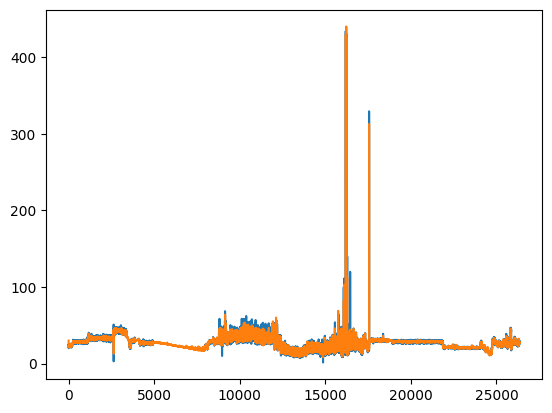

In [39]:
plt.plot(y['PM2.5 (µg/m³)'])
plt.plot(pred_check)
plt.show()

In [40]:
from sklearn.metrics import r2_score

r2 = r2_score(y['PM2.5 (µg/m³)'], pred_check)
print("R² score:", r2)

R² score: 0.9638337033276141


In [41]:
import joblib
joblib.dump(model, 'Kerala_PM2.5_µgm³.pkl')

['Kerala_PM2.5_µgm³.pkl']

In [42]:
model.fit(X, y['PM10 (µg/m³)'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [43]:
pred_check2 = model.predict(X)

In [44]:
r2 = r2_score(y['PM10 (µg/m³)'], pred_check2)
print("R² score:", r2)

R² score: 0.9453119676029426


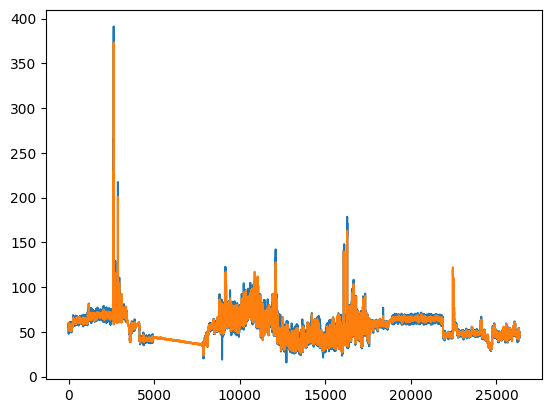

In [45]:
plt.plot(y['PM10 (µg/m³)'])
plt.plot(pred_check2)
plt.show()

In [46]:
joblib.dump(model, 'Kerala_PM10_µgm³.pkl')

['Kerala_PM10_µgm³.pkl']